<a href="https://www.kaggle.com/code/seoyunje/nih-chest-x-ray-eda-baseline-starter?scriptVersionId=191229549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import numpy as np, pandas as pd 
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- `Target Class`: 16(inclunding No finding)
- `Unique Patient`: 29561
- `Total of Dataset`: 91312

In [2]:
df = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')
df.drop(columns=['Unnamed: 11'],inplace=True)
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (112120, 11)


Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.143  0.143

In [3]:
print(df['Patient Age'].sort_values(ascending=False).head(20))
df = df[df['Patient Age'] < 100]

46965     414
86264     413
91369     412
85404     412
20852     412
84810     411
101194    155
104590    155
98495     154
95794     153
74884     152
78795     151
58650     150
62929     149
48284     148
55742     148
58464      95
578        94
74733      94
74737      94
Name: Patient Age, dtype: int64


In [4]:
def Path(row):
    for i in range(1,13):
        row[7] == i
        return f'/kaggle/input/data/images_00{i}/images/{row}'
    
df['path'] = df['Image Index'].apply(lambda x: Path(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112104 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112104 non-null  object 
 1   Finding Labels               112104 non-null  object 
 2   Follow-up #                  112104 non-null  int64  
 3   Patient ID                   112104 non-null  int64  
 4   Patient Age                  112104 non-null  int64  
 5   Patient Gender               112104 non-null  object 
 6   View Position                112104 non-null  object 
 7   OriginalImage[Width          112104 non-null  int64  
 8   Height]                      112104 non-null  int64  
 9   OriginalImagePixelSpacing[x  112104 non-null  float64
 10  y]                           112104 non-null  float64
 11  path                         112104 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.1+ MB


In [6]:
categorical_columns = df.select_dtypes(include=['category','object']).columns
print(categorical_columns)
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

Index(['Image Index', 'Finding Labels', 'Patient Gender', 'View Position',
       'path'],
      dtype='object')


In [7]:
df[numerical_columns].describe()

Follow-up #     Patient ID    Patient Age  OriginalImage[Width  \
count  112104.000000  112104.000000  112104.000000        112104.000000   
mean        8.574172   14345.720724      46.872574          2646.035253   
std        15.406734    8403.980520      16.598152           341.243771   
min         0.000000       1.000000       1.000000          1143.000000   
25%         0.000000    7308.000000      35.000000          2500.000000   
50%         3.000000   13993.000000      49.000000          2518.000000   
75%        10.000000   20673.000000      59.000000          2992.000000   
max       183.000000   30805.000000      95.000000          3827.000000   

             Height]  OriginalImagePixelSpacing[x             y]  
count  112104.000000                112104.000000  112104.000000  
mean     2486.393153                     0.155651       0.155651  
std       401.270806                     0.016174       0.016174  
min       966.000000                     0.115000       0.115000  
25%      2048.000000                     0.143000       0.143000  
50%      2544.000000                     0.143000       0.143000  
75%      2991.000000                     0.168000       0.168000  
max      4715.000000                     0.198800       0.198800

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>Target</b></div>
___

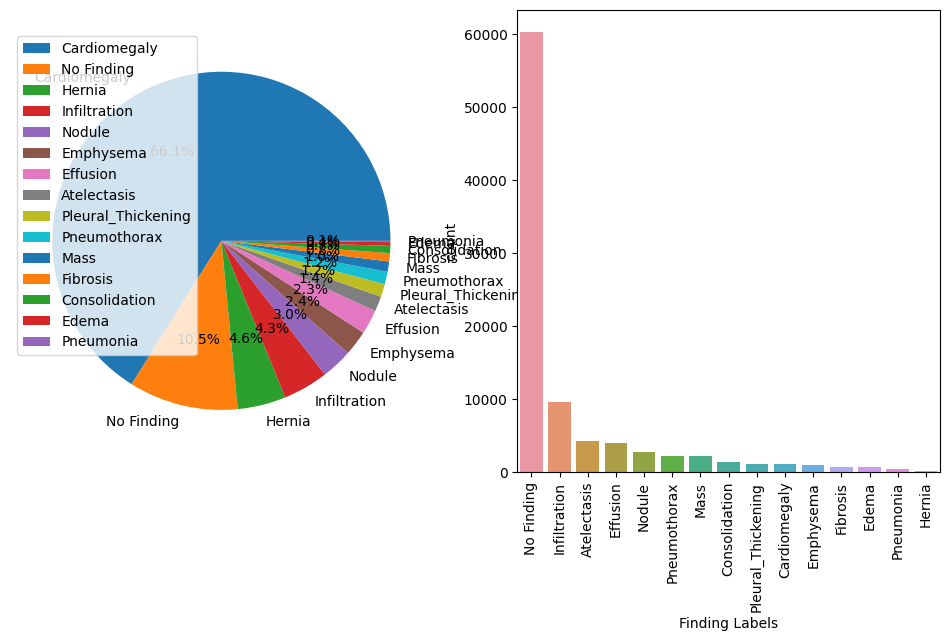

In [8]:
tmp = df[~df['Finding Labels'].str.contains('\|')] # MultiLabel
labels = tmp['Finding Labels'].unique()
label_counts = tmp['Finding Labels'].value_counts()[:15]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(tmp['Finding Labels'].value_counts(), labels=labels, autopct='%.1f%%')
plt.legend()
plt.subplot(1,2,2)
sns.countplot(x=tmp['Finding Labels'], order= label_counts.index)
plt.xticks(rotation=90)
plt.show()

**Removing MulitLabels**

In [9]:
df = df[~df['Finding Labels'].str.contains('\|')]
df.shape # 112120 -> 91312

(91312, 12)

In [10]:
# TARS = {'No Finding': 0, 'Infiltration': 1, 'Atelectasis': 2, 'Effusion': 3, 'Nodule': 4, 'Pneumothroax': 5, 'Mass': 6, 'Consolidation': 7, 'Pleural_Thickening': 8, 'Cardiomegaly': 9, 'Empysema': 10, 'Fibrosis': 11, 'Fibrosis': 12, 'Edema': 13, 'Pneumonia': 14, 'Hernia': 15}

# df['Finding Labels'].replace(TARS, inplace=True)

In [11]:
!pip -q install palettable
import palettable.colorbrewer.qualitative as pcq

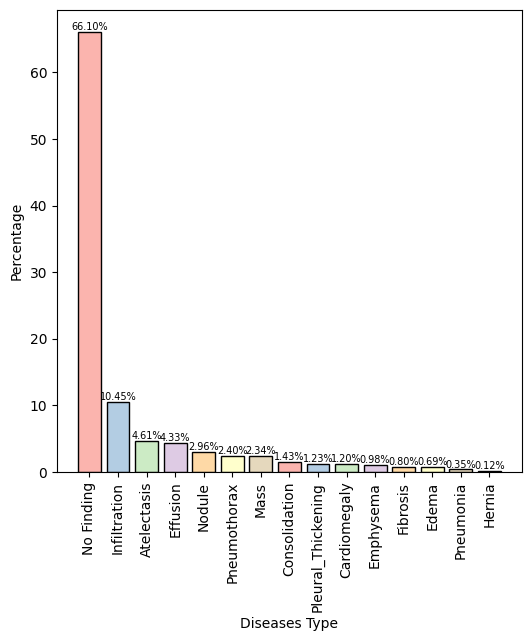

In [12]:
plt.figure(figsize=(6,6))


tmp = df['Finding Labels'].value_counts()

ax = plt.bar(tmp.index, tmp.values/np.sum(tmp.values)*100, color=pcq.Pastel1_7.hex_colors, edgecolor='black')
for rect in ax:
    x = rect.get_x() + rect.get_width()/2.0
    y = rect.get_height()
    plt.text(x,y, f'{y:.2f}%', ha='center', va='bottom', size=7)
plt.xlabel('Diseases Type')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

In [13]:
df

Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
0       00000001_000.png   Cardiomegaly            0           1           58   
3       00000002_000.png     No Finding            0           2           81   
4       00000003_000.png         Hernia            0           3           81   
5       00000003_001.png         Hernia            1           3           74   
6       00000003_002.png         Hernia            2           3           75   
...                  ...            ...          ...         ...          ...   
112114  00030801_000.png     No Finding            0       30801           39   
112116  00030802_000.png     No Finding            0       30802           29   
112117  00030803_000.png     No Finding            0       30803           42   
112118  00030804_000.png     No Finding            0       30804           30   
112119  00030805_000.png     No Finding            0       30805           27   

       Patient Gender View Position  OriginalImage[Width  Height]  \
0                   M            PA                 2682     2749   
3                   M            PA                 2500     2048   
4                   F            PA                 2582     2991   
5                   F            PA                 2500     2048   
6                   F            PA                 2048     2500   
...               ...           ...                  ...      ...   
112114              M            PA                 2500     2048   
112116              M            PA                 2048     2500   
112117              F            PA                 2048     2500   
112118              F            PA                 2048     2500   
112119              M            PA                 2048     2500   

        OriginalImagePixelSpacing[x     y]  \
0                             0.143  0.143   
3                             0.171  0.171   
4                             0.143  0.143   
5                             0.168  0.168   
6                             0.168  0.168   
...                             ...    ...   
112114                        0.168  0.168   
112116                        0.168  0.168   
112117                        0.168  0.168   
112118                        0.168  0.168   
112119                        0.171  0.171   

                                                     path  
0       /kaggle/input/data/images_001/images/00000001_...  
3       /kaggle/input/data/images_001/images/00000002_...  
4       /kaggle/input/data/images_001/images/00000003_...  
5       /kaggle/input/data/images_001/images/00000003_...  
6       /kaggle/input/data/images_001/images/00000003_...  
...                                                   ...  
112114  /kaggle/input/data/images_001/images/00030801_...  
112116  /kaggle/input/data/images_001/images/00030802_...  
112117  /kaggle/input/data/images_001/images/00030803_...  
112118  /kaggle/input/data/images_001/images/00030804_...  
112119  /kaggle/input/data/images_001/images/00030805_...  

[91312 rows x 12 columns]

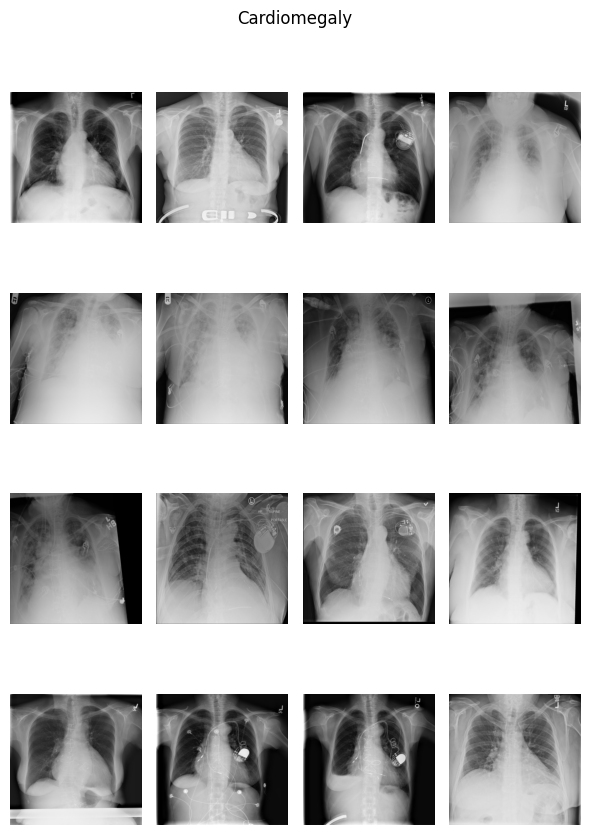

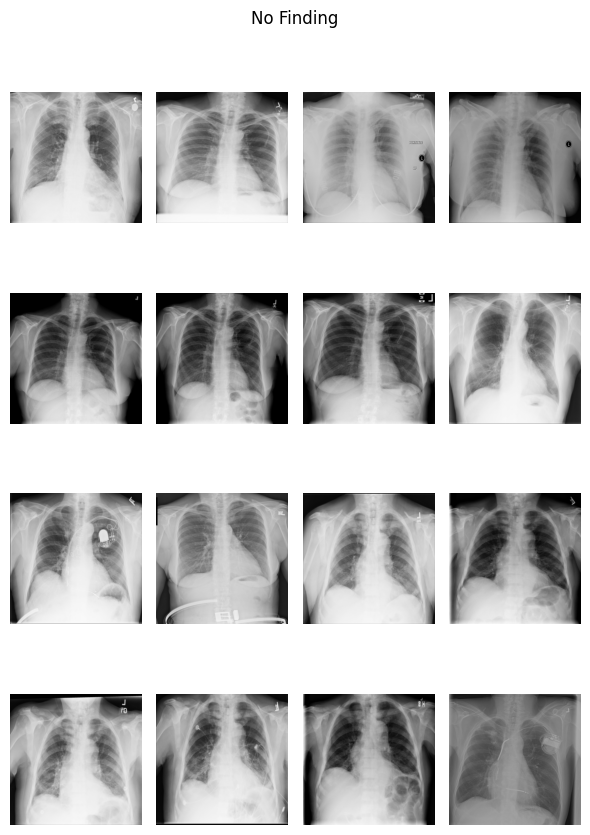

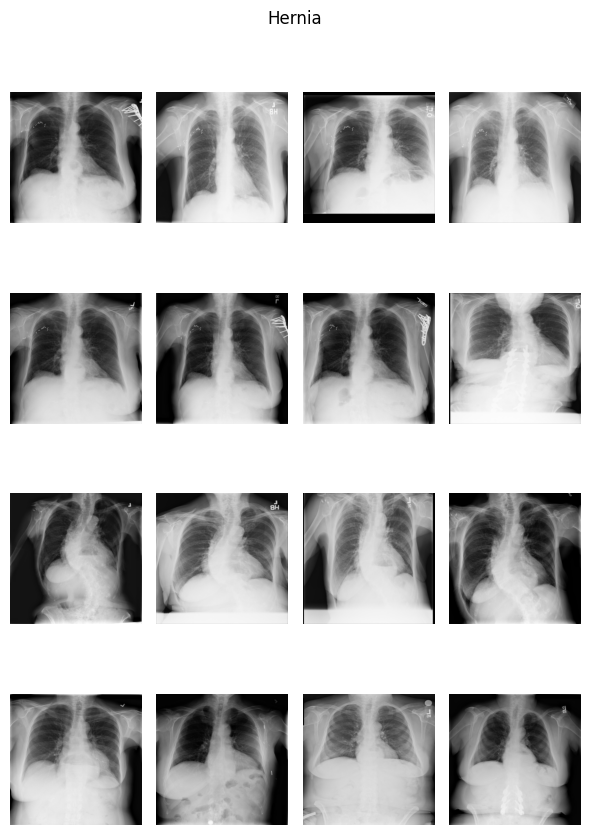

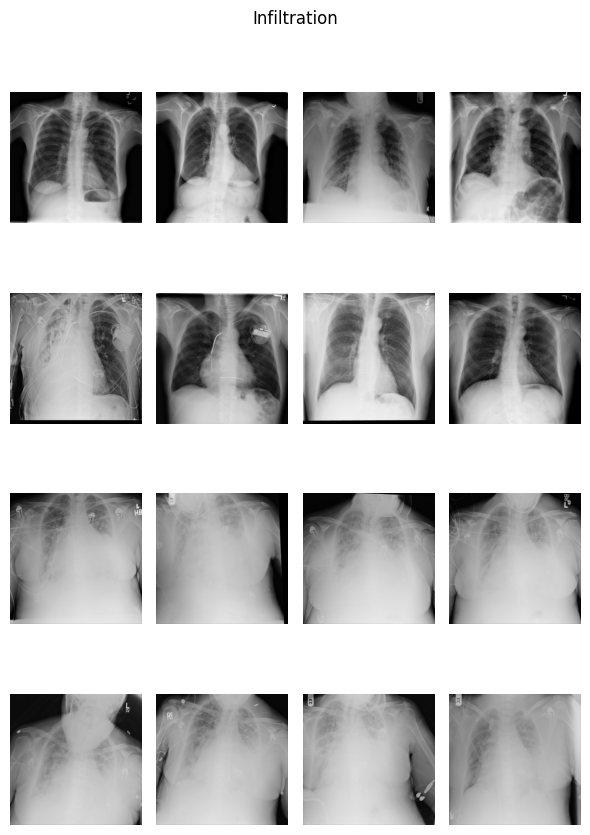

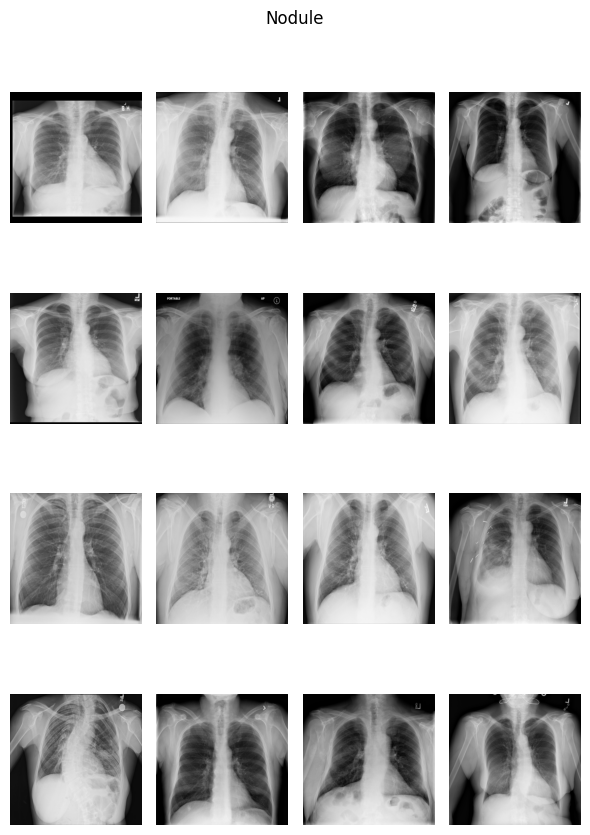

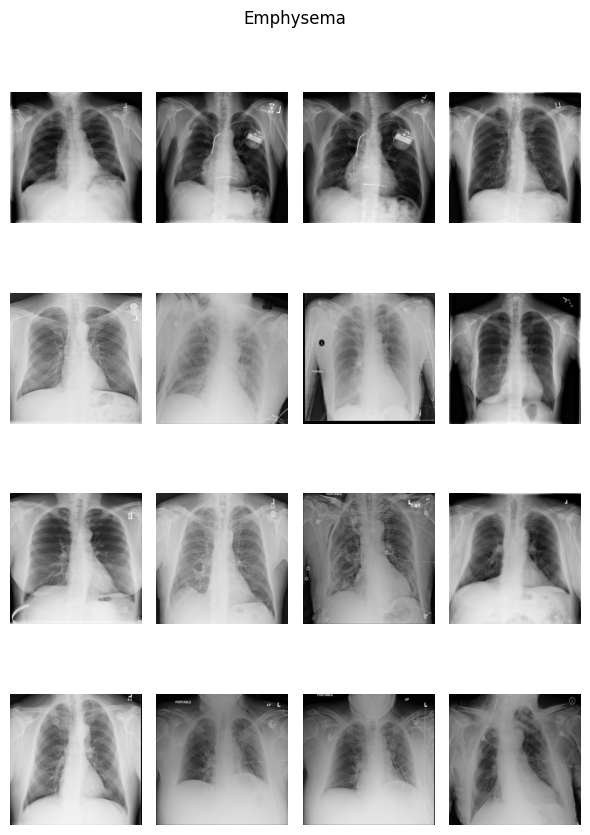

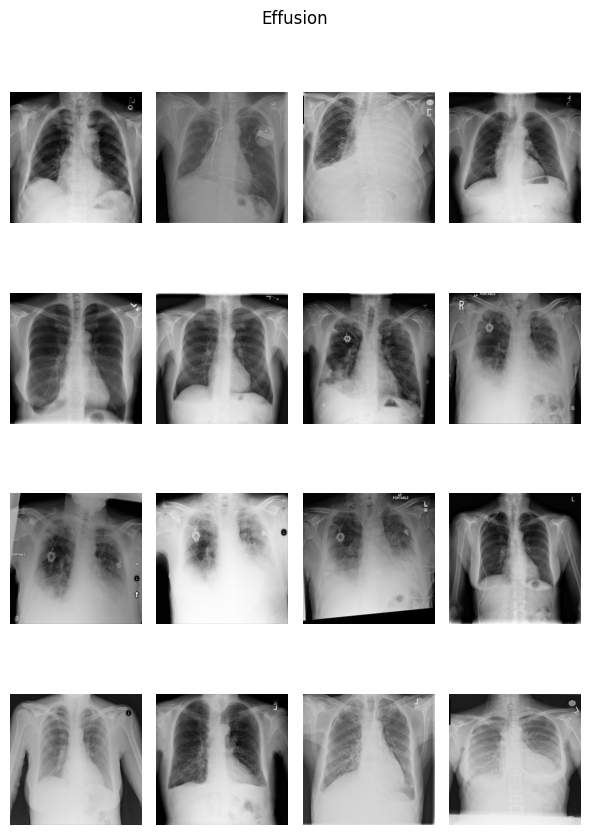

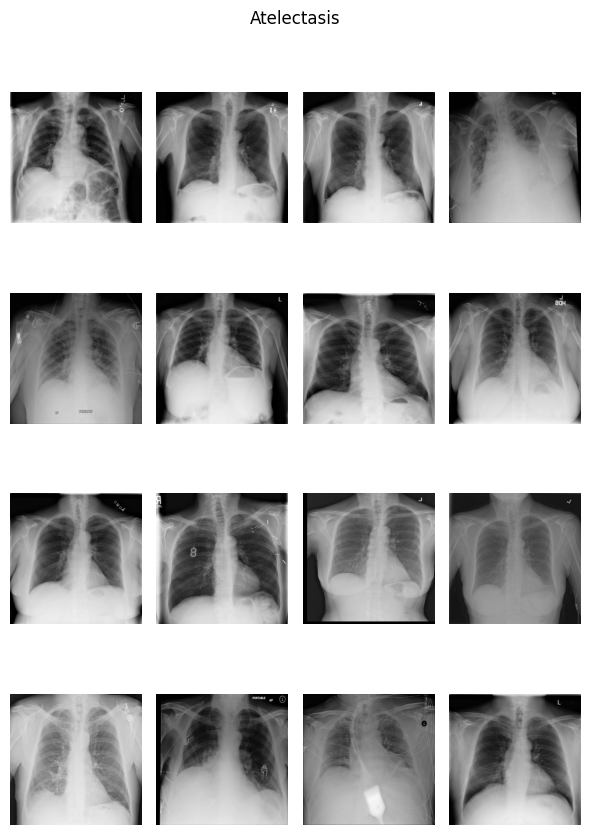

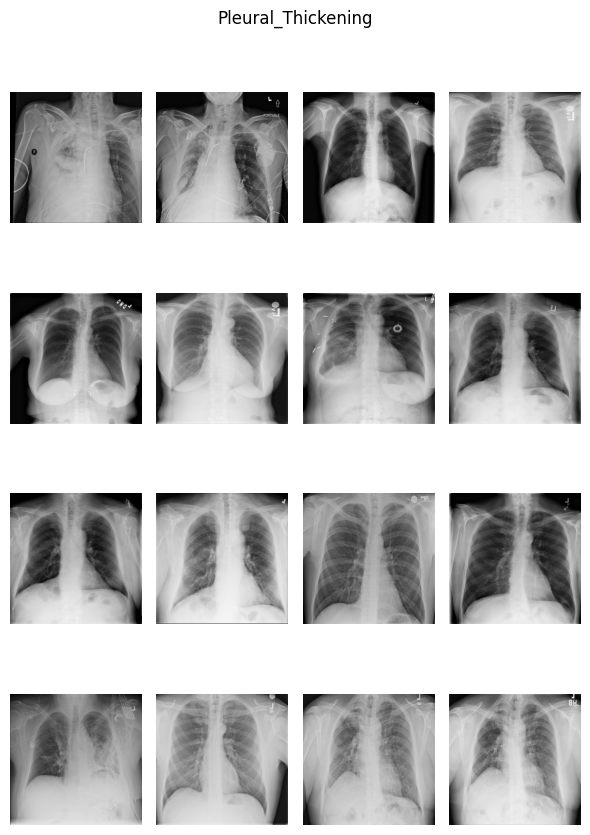

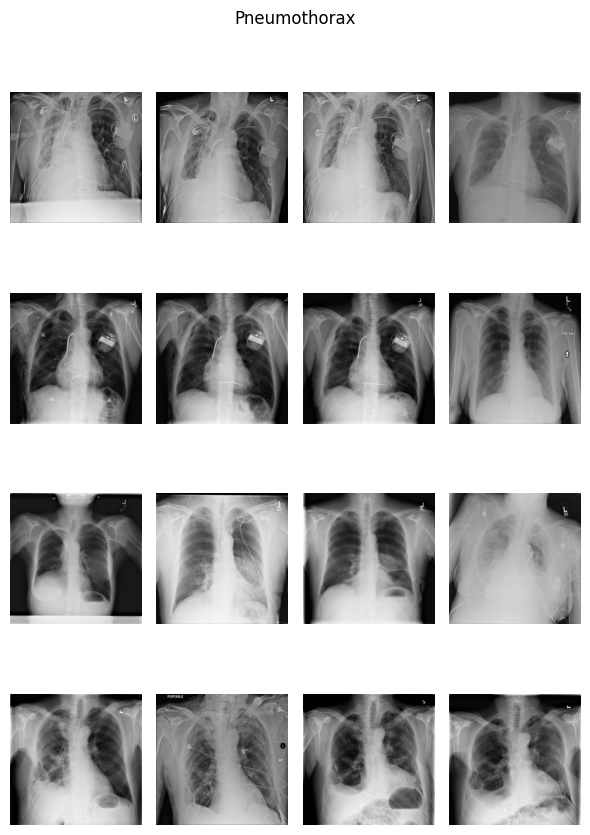

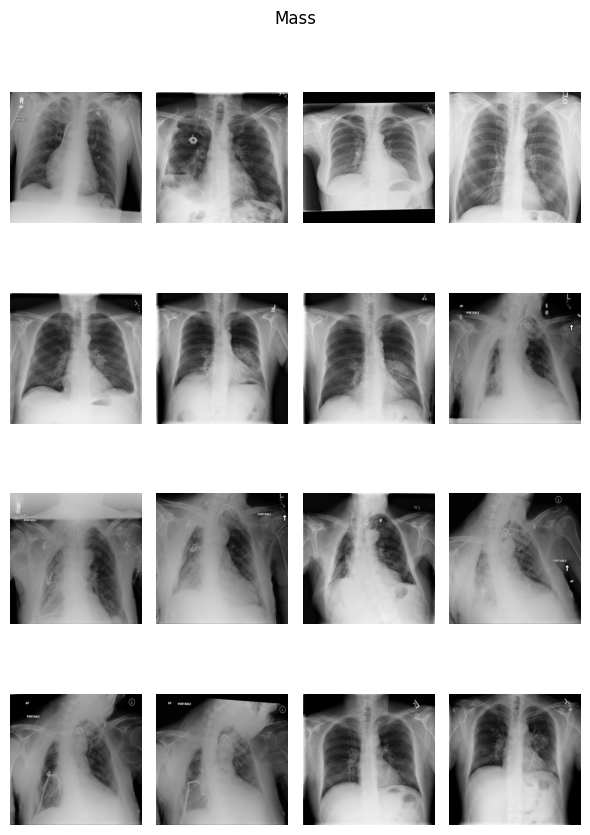

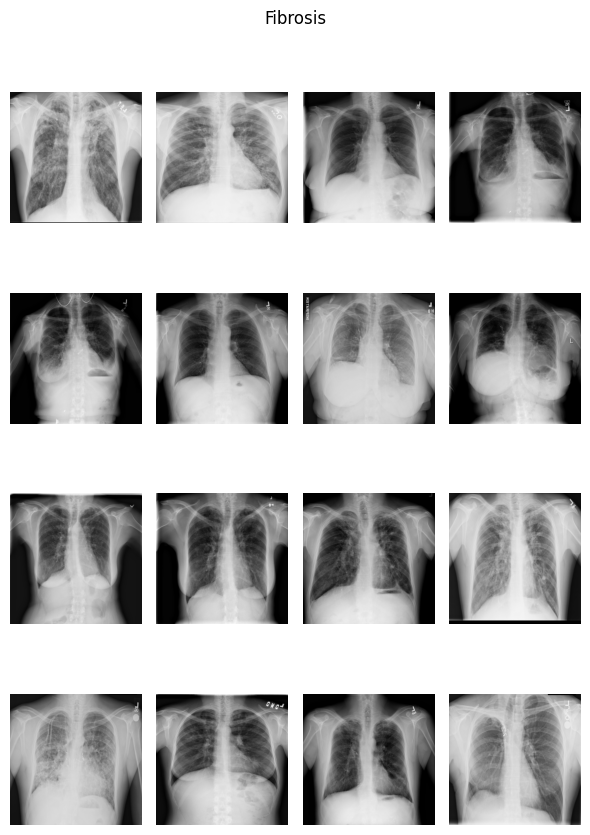

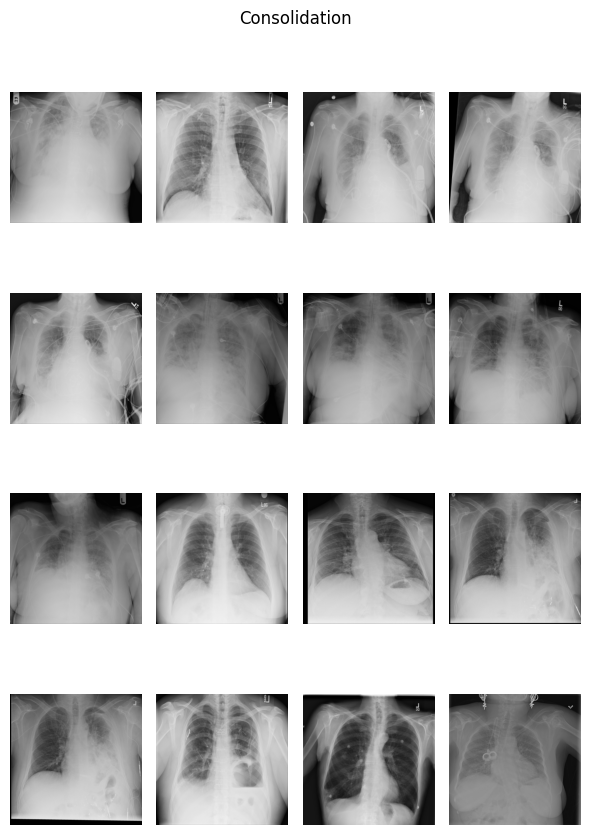

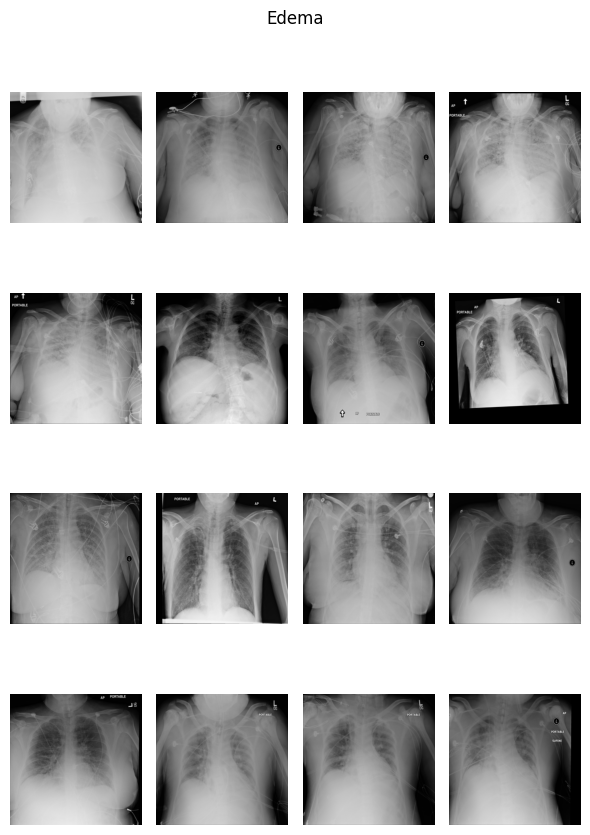

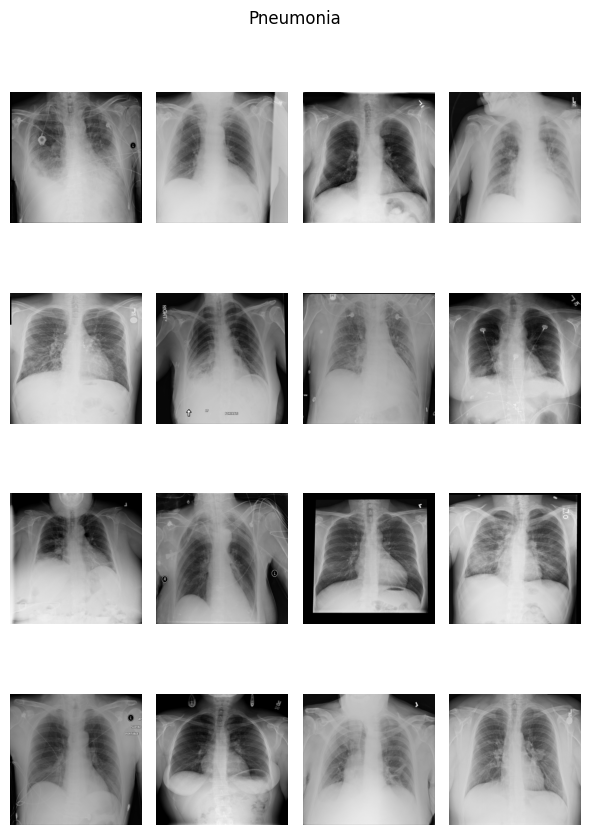

In [14]:
from PIL import Image



for label in df['Finding Labels'].unique():
    tmp = df[df['Finding Labels'] == label]

    plt.figure(figsize=(6,9))
    for i in range(16):
        plt.subplot(4,4,i+1)
        path = tmp.iloc[i]['path']
        img = Image.open(path).convert('RGB')
        img = img.resize((256,256), Image.Resampling.LANCZOS)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
    
    plt.suptitle(label) 
    plt.tight_layout()
    plt.show()

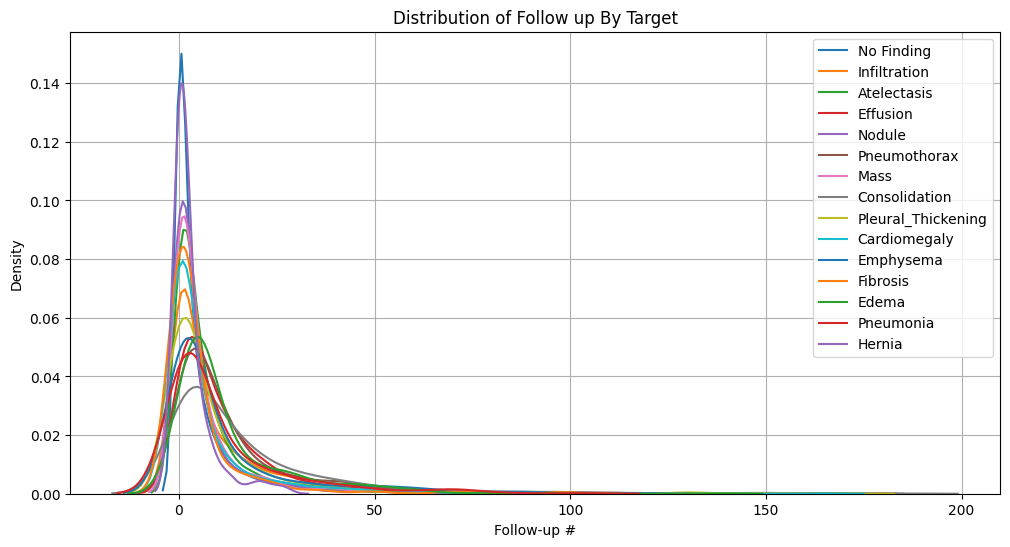

In [15]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Follow up By Target")
for col in df['Finding Labels'].value_counts().index: 
    sns.kdeplot(x= df[df['Finding Labels'] == col]['Follow-up #'], label=col)

plt.grid(True)
plt.legend()
plt.show()

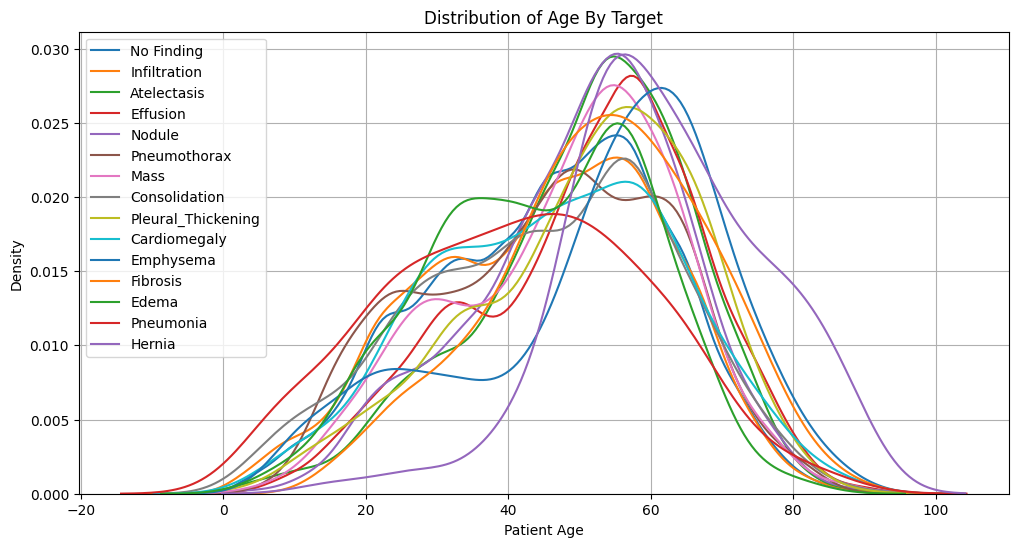

In [16]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Age By Target")
for col in df['Finding Labels'].value_counts().index: 
    sns.kdeplot(x= df[df['Finding Labels'] == col]['Patient Age'], label=col)

plt.grid(True)
plt.legend()
plt.show()

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>Gender</b></div>
___

**Mapping**

In [17]:
# Gender = {'M': 0, 'F':1}
# df['Patient Gender'] = df['Patient Gender'].map(Gender)

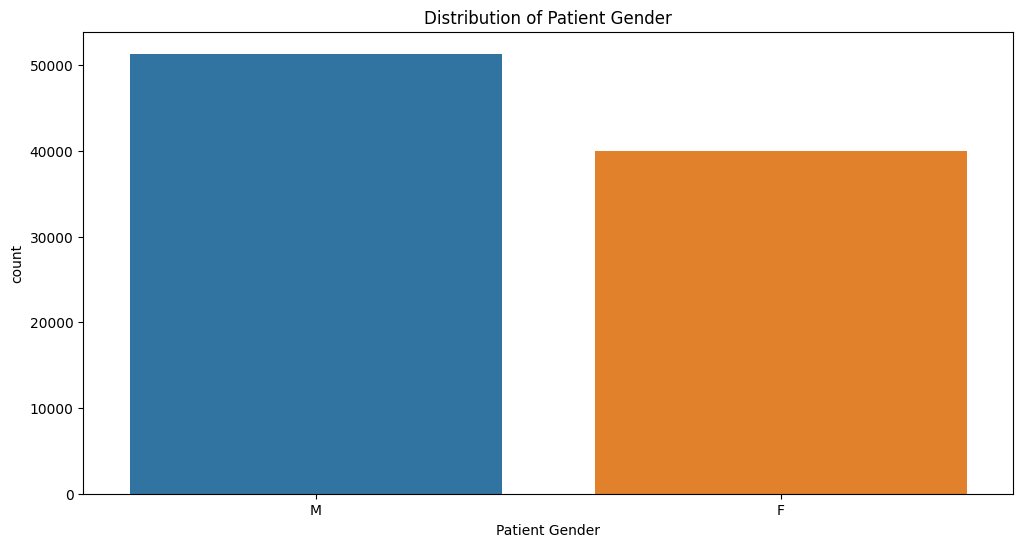

In [18]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Patient Gender")
sns.countplot(x = df['Patient Gender'])
plt.show()

<Figure size 1200x600 with 0 Axes>

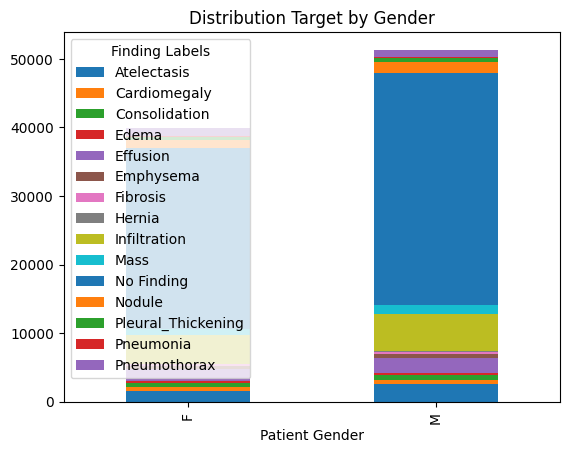

In [19]:
tmp = df.groupby(['Patient Gender','Finding Labels']).size().unstack()
plt.figure(figsize=(12,6))
tmp.plot(kind='bar', stacked=True)
plt.title('Distribution Target by Gender')
plt.show()

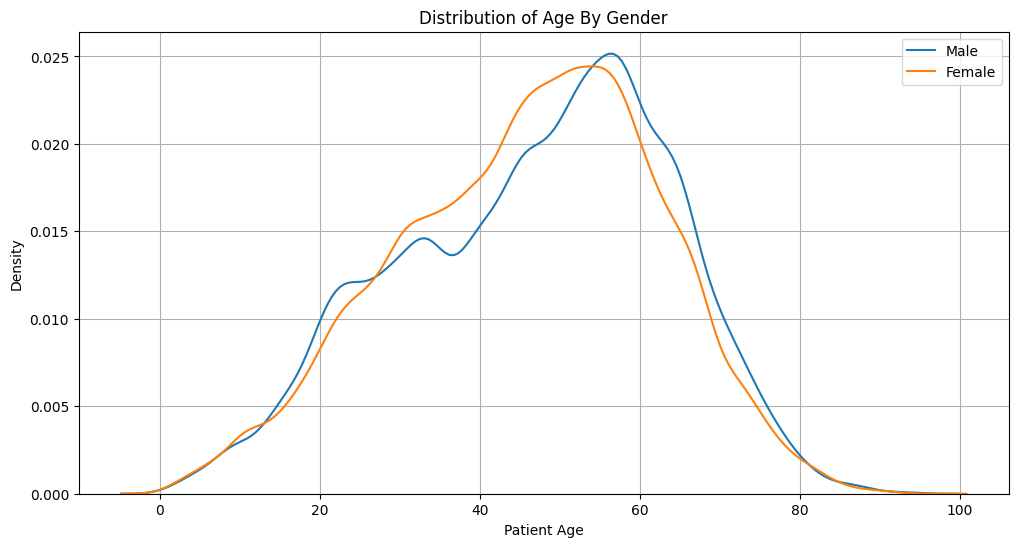

In [20]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Age By Gender")
sns.kdeplot(x= df[df['Patient Gender'] == 'M']['Patient Age'], label='Male')
sns.kdeplot(x= df[df['Patient Gender'] == 'F']['Patient Age'], label='Female')
plt.grid(True)
plt.legend()
plt.show()

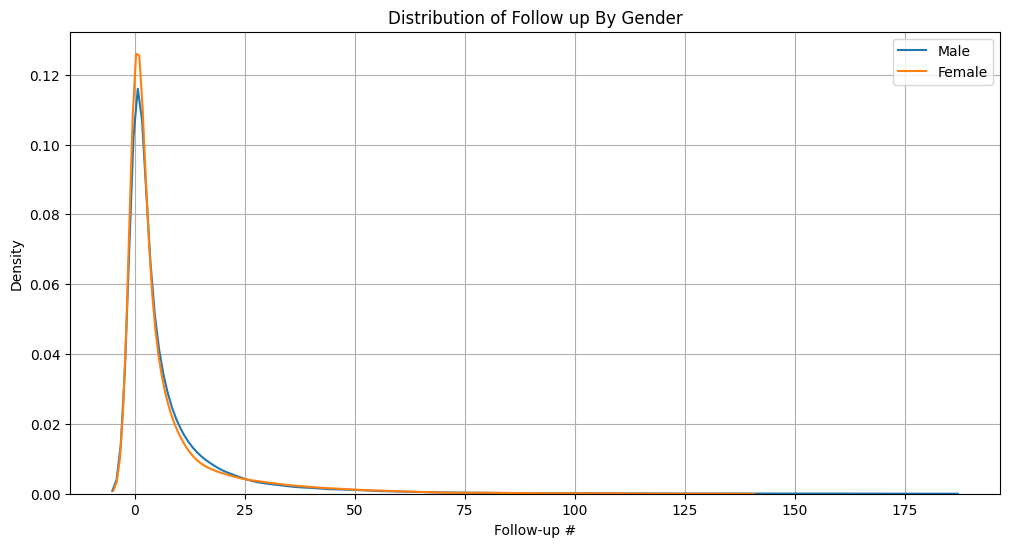

In [21]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Follow up By Gender")
sns.kdeplot(x= df[df['Patient Gender'] == 'M']['Follow-up #'], label='Male')
sns.kdeplot(x= df[df['Patient Gender'] == 'F']['Follow-up #'], label='Female')
plt.grid(True)
plt.legend()
plt.show()

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>ViewPosition</b></div>
___

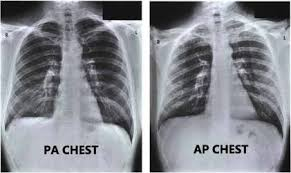

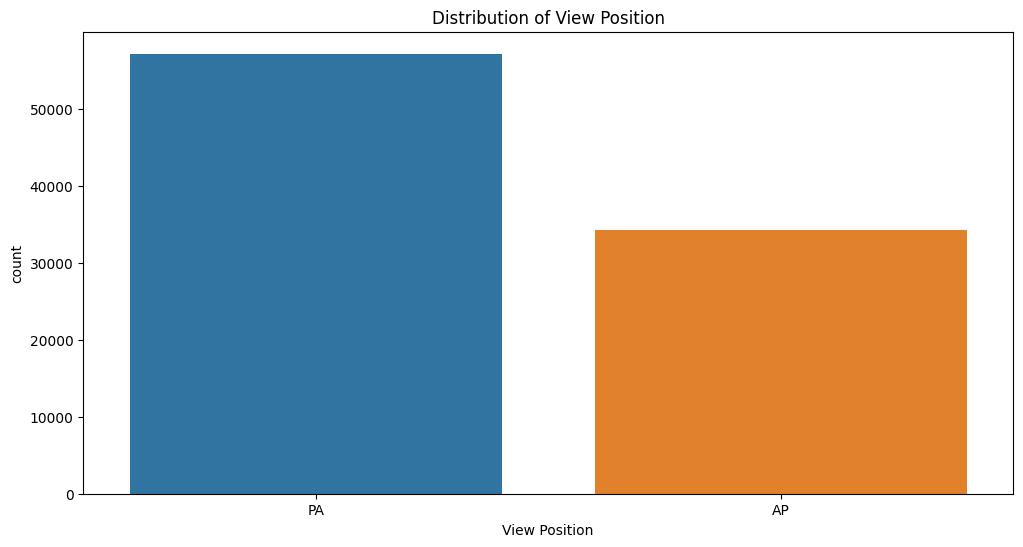

In [22]:
plt.figure(figsize=(12,6))
plt.title("Distribution of View Position")
sns.countplot(x = df['View Position'])
plt.show()

<Figure size 1200x600 with 0 Axes>

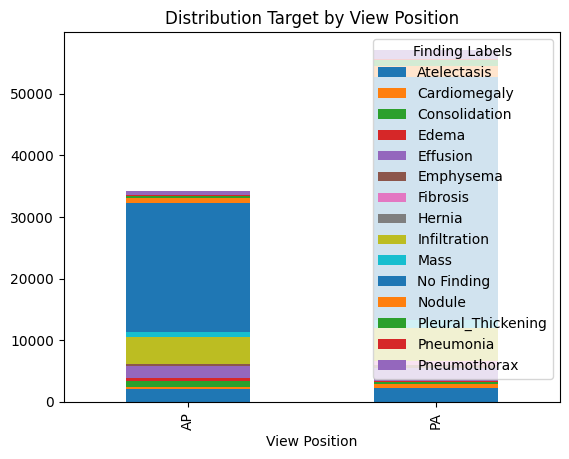

In [23]:
tmp = df.groupby(['View Position','Finding Labels']).size().unstack()
plt.figure(figsize=(12,6))
tmp.plot(kind='bar', stacked=True)
plt.title('Distribution Target by View Position')
plt.show()

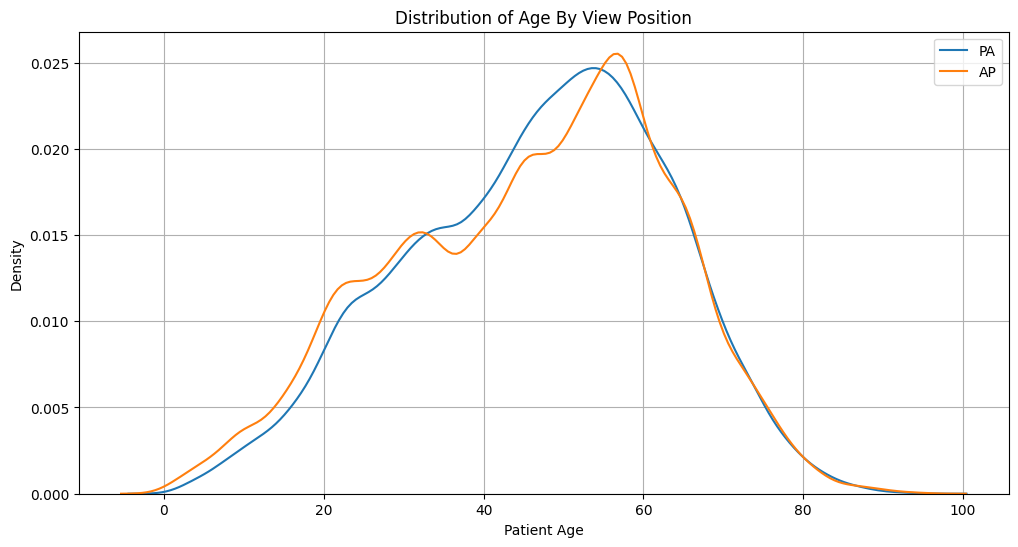

In [24]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Age By View Position")
sns.kdeplot(x= df[df['View Position'] == 'PA']['Patient Age'], label='PA')
sns.kdeplot(x= df[df['View Position'] == 'AP']['Patient Age'], label='AP')
plt.grid(True)
plt.legend()
plt.show()

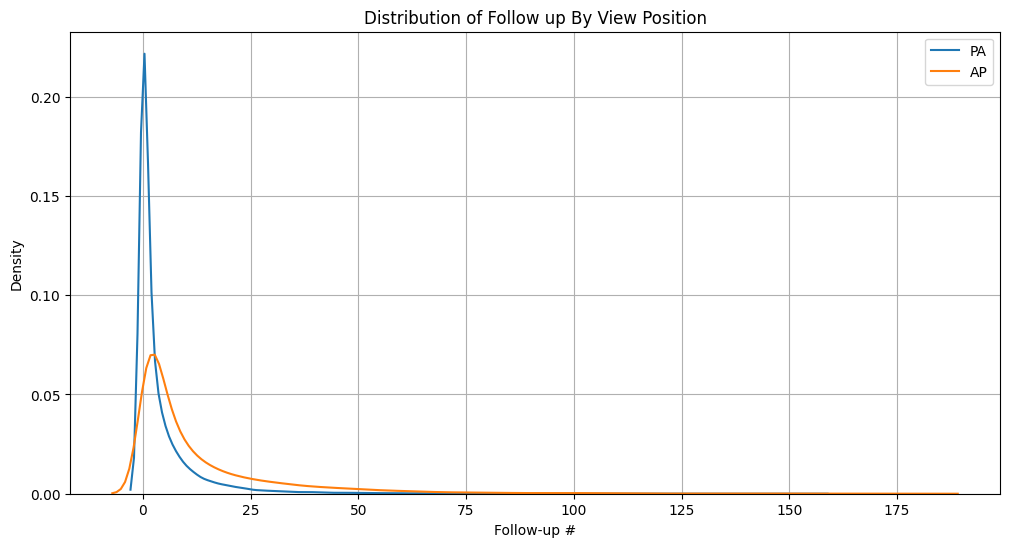

In [25]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Follow up By View Position")
sns.kdeplot(x= df[df['View Position'] == 'PA']['Follow-up #'], label='PA')
sns.kdeplot(x= df[df['View Position'] == 'AP']['Follow-up #'], label='AP')
plt.grid(True)
plt.legend()
plt.show()

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>Age Group</b></div>
___

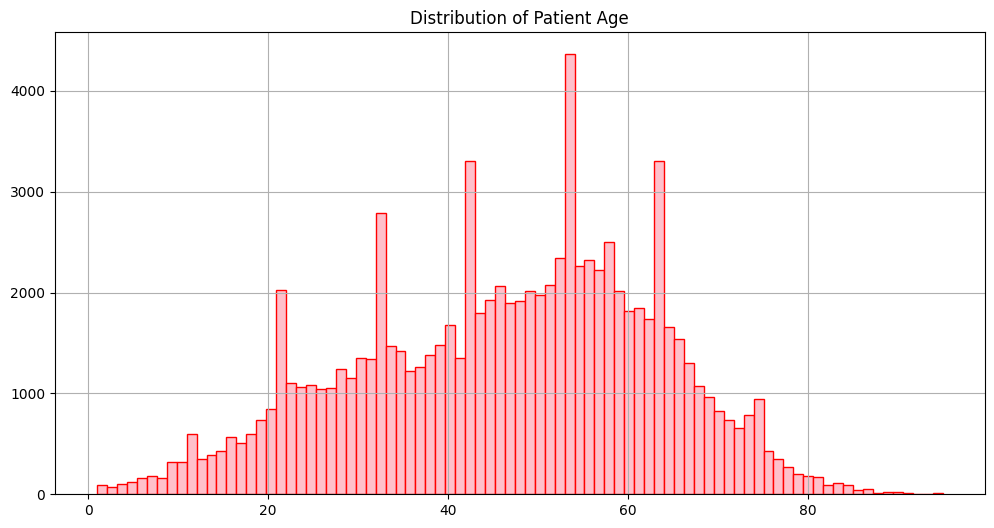

In [26]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Patient Age")
plt.hist(x = df['Patient Age'], bins='auto', color='pink', edgecolor='red')
plt.grid(True)
plt.show()

In [27]:
def Age(row):
    if row <= 10:
        return 0
    elif (10 < row) & (20 >= row):
        return 1
    elif (20 < row) & (30 >= row):
        return 2
    elif (30 < row) & (40 >= row):
        return 3
    elif (40 < row) & (50 >= row):
        return 4
    elif (50 < row) & (60 >= row):
        return 5
    elif (60 < row) & (70 >= row):
        return 6
    elif (70 < row) & (80 >= row):
        return 7
    elif (80 < row) & (90 >= row):
        return 8
    elif (90 < row) & (100 >= row):
        return 9
    
df['Age Group'] = df['Patient Age'].map(lambda x: Age(x))

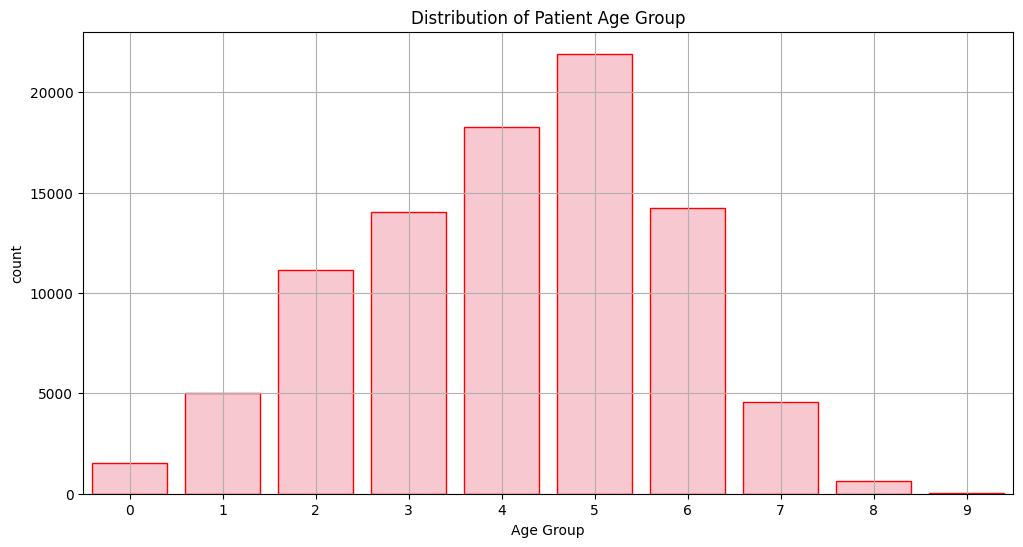

In [28]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Patient Age Group")
sns.countplot(x = df['Age Group'], color='pink', edgecolor='red')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

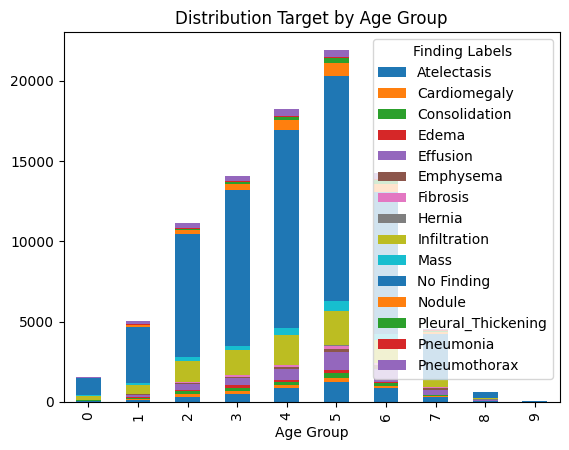

In [29]:
tmp = df.groupby(['Age Group','Finding Labels']).size().unstack()
plt.figure(figsize=(12,6))
tmp.plot(kind='bar', stacked=True)
plt.title('Distribution Target by Age Group')
plt.show()

<Figure size 1200x600 with 0 Axes>

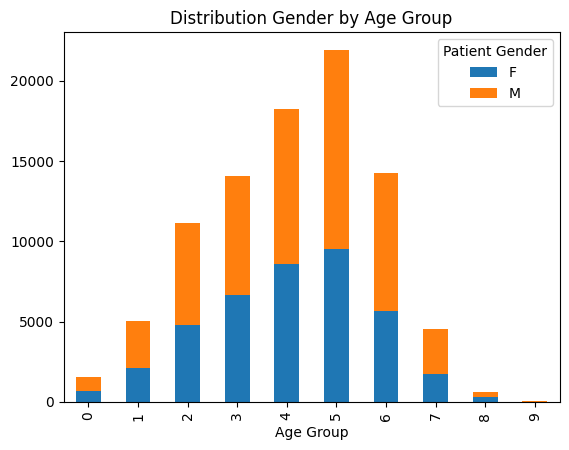

In [30]:
tmp = df.groupby(['Age Group','Patient Gender']).size().unstack()
plt.figure(figsize=(12,6))
tmp.plot(kind='bar', stacked=True)
plt.title('Distribution Gender by Age Group')
plt.show()

<Figure size 1200x600 with 0 Axes>

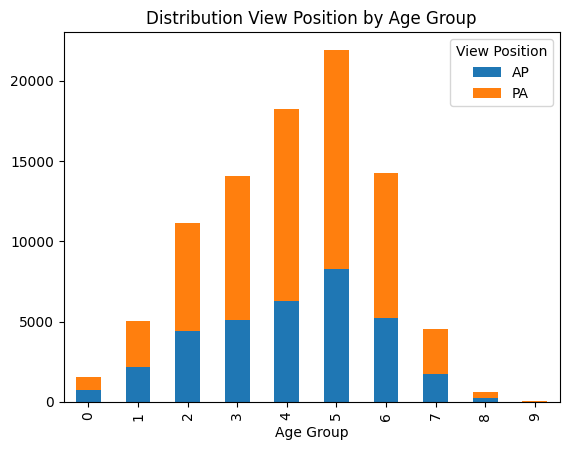

In [31]:
tmp = df.groupby(['Age Group','View Position']).size().unstack()
plt.figure(figsize=(12,6))
tmp.plot(kind='bar', stacked=True)
plt.title('Distribution View Position by Age Group')
plt.show()

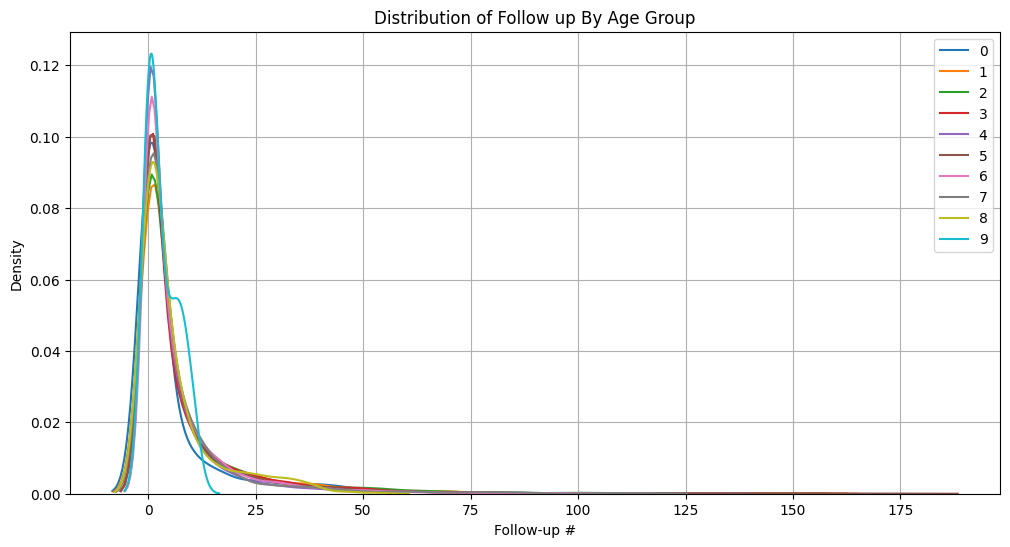

In [32]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Follow up By Age Group")
for i in range(10):
    sns.kdeplot(x= df[df['Age Group'] == i]['Follow-up #'], label=i)
plt.grid(True)
plt.legend()
plt.show()

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>Patient Id</b></div>
___

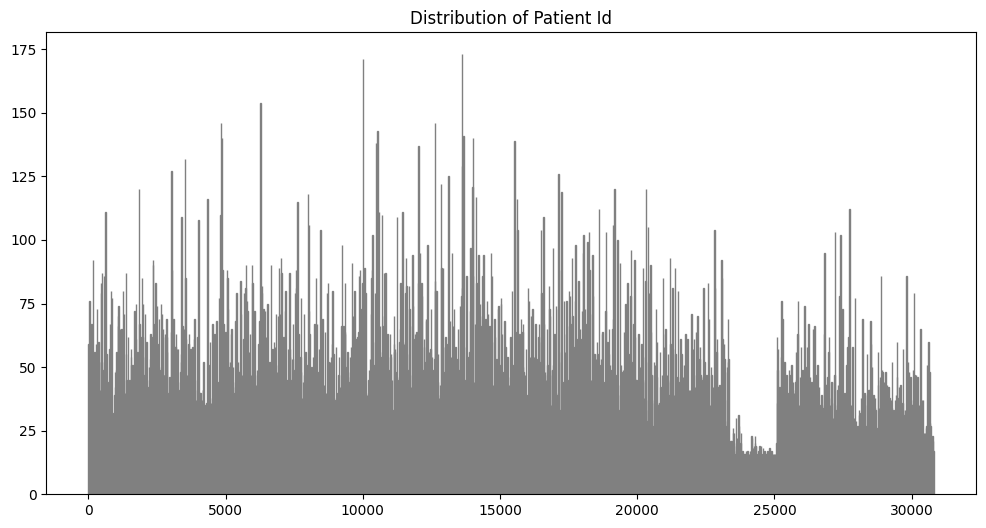

In [33]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Patient Id')
plt.hist(df['Patient ID'], bins=2000,color='white', edgecolor='gray')
plt.show()

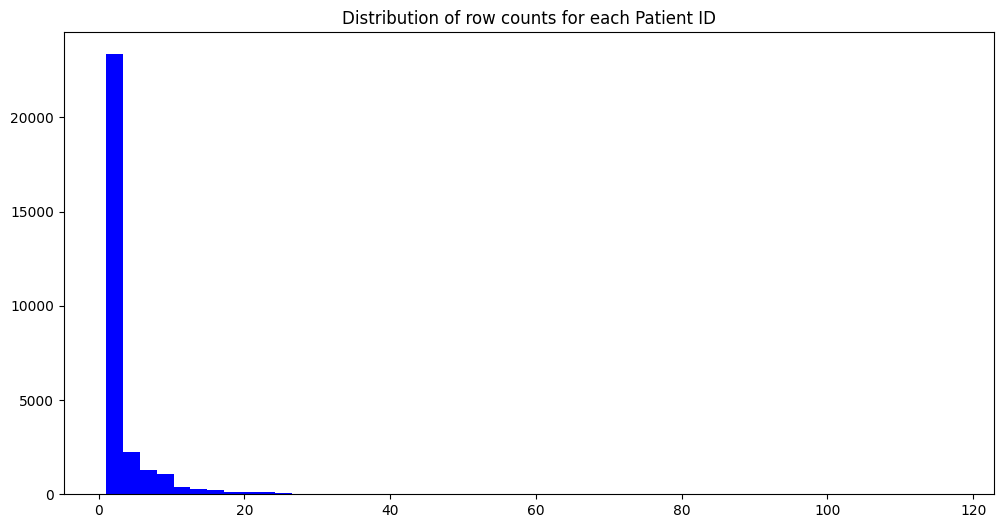

In [34]:
tmp = df['Patient ID'].value_counts()

plt.figure(figsize=(12,6))
plt.title('Distribution of row counts for each Patient ID')
plt.hist(tmp, bins=50, color='blue')
plt.show()

In [35]:
TARS = {'No Finding': 0, 'Infiltration': 1, 'Atelectasis': 2, 'Effusion': 3, 'Nodule': 4, 'Pneumothorax': 5, 'Mass': 6, 'Consolidation': 7, 'Pleural_Thickening': 8, 'Cardiomegaly': 9, 'Emphysema': 10, 'Fibrosis': 11, 'Fibrosis': 12, 'Edema': 13, 'Pneumonia': 14, 'Hernia': 15}

df['Finding Labels'].replace(TARS, inplace=True)
df['Finding Labels'] = df['Finding Labels'].astype('int64')
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [36]:
View = {'PA': 0, 'AP':1}
df['View Position'] = df['View Position'].map(View)

In [37]:
sample_patients = df['Patient ID'].sample(20, random_state=42).values
tmp = df[df['Patient ID'].isin(sample_patients)]

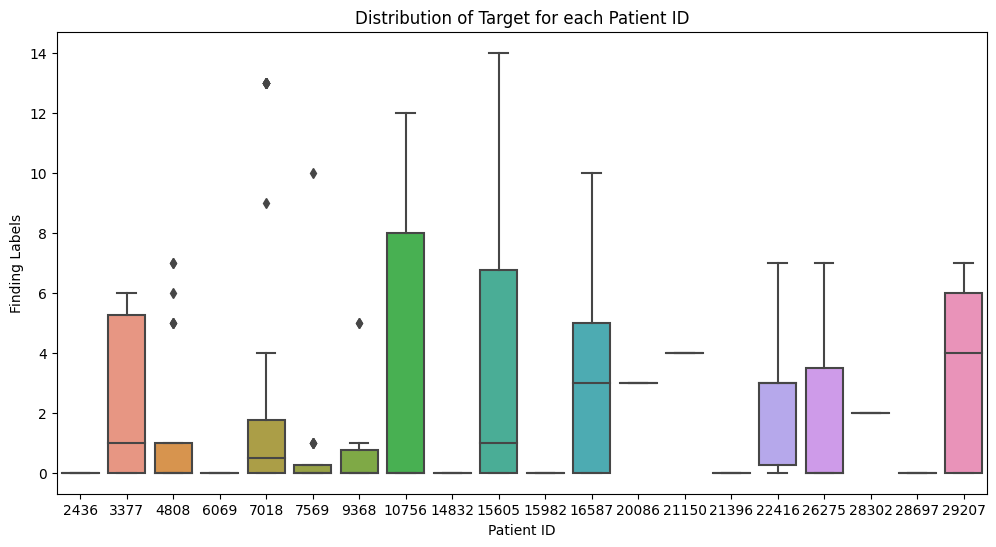

In [38]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Target for each Patient ID')
sns.boxplot(x='Patient ID', y='Finding Labels', data=tmp)
plt.show()

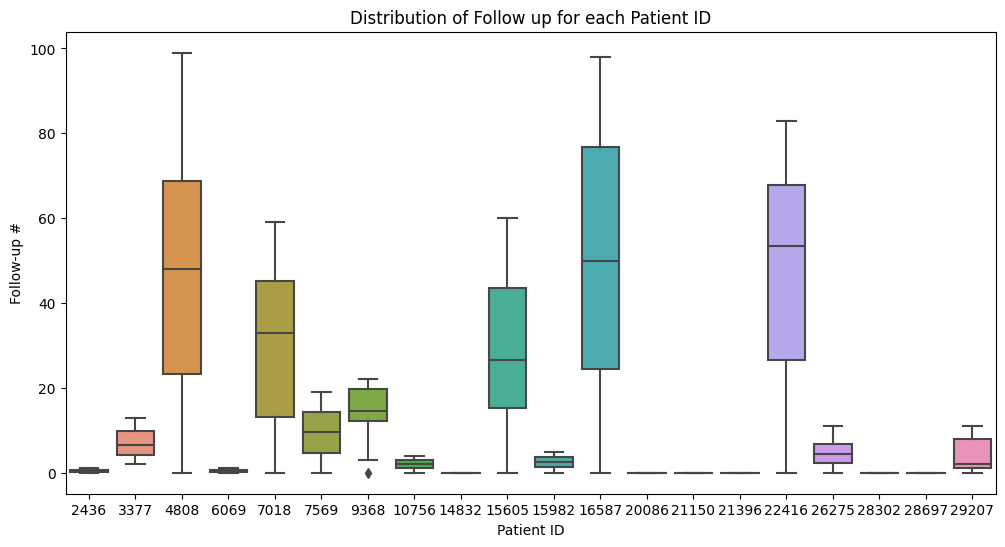

In [39]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Follow up for each Patient ID')
sns.boxplot(x='Patient ID', y='Follow-up #', data=tmp)
plt.show()

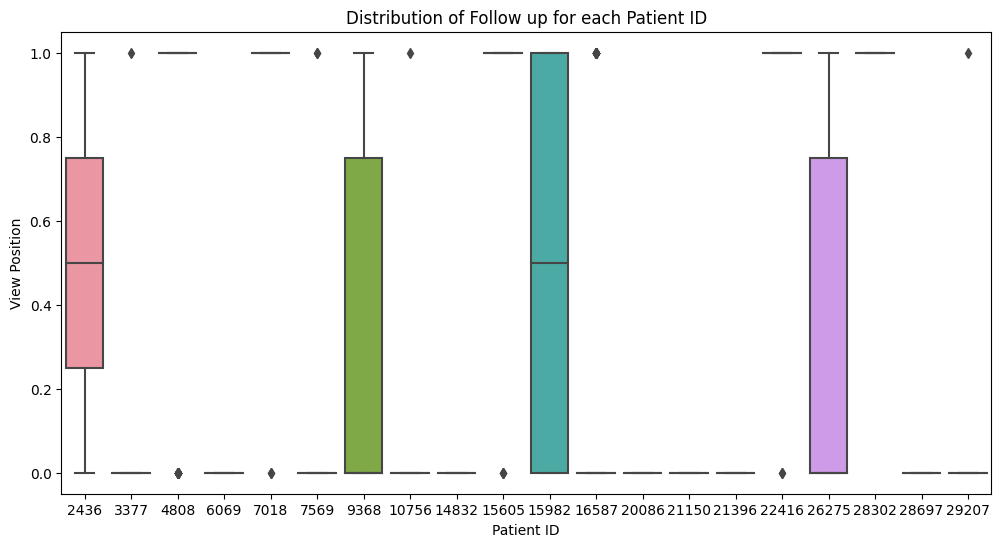

In [40]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Follow up for each Patient ID')
sns.boxplot(x='Patient ID', y='View Position', data=tmp)
plt.show()

# <div style="padding: 25px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#000000"><b><span style='color:#FFA500'></span></b> <b>Follow up</b></div>
___

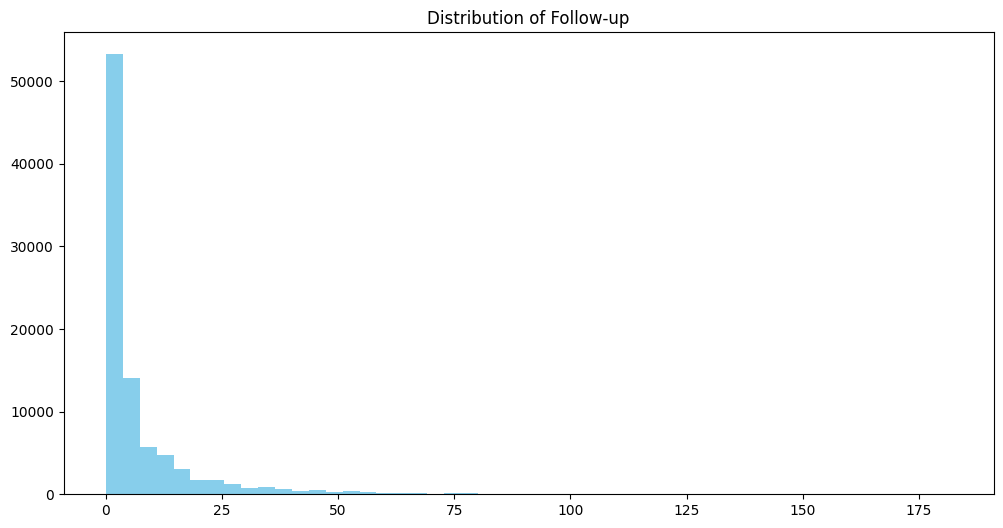

In [41]:
tmp = df['Follow-up #'].value_counts()

plt.figure(figsize=(12,6))
plt.title('Distribution of Follow-up')
plt.hist(x=df['Follow-up #'], bins=50, color='skyblue')
plt.show()

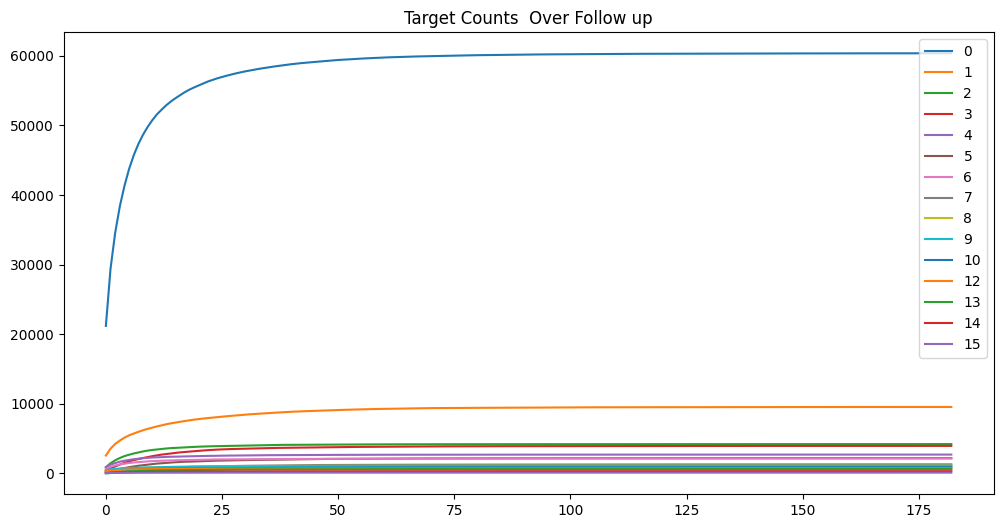

In [42]:
tmp = df.groupby(['Follow-up #','Finding Labels']).size().unstack().fillna(0).cumsum().reset_index()

plt.figure(figsize=(12,6))
for col in df['Finding Labels'].value_counts().index:
    plt.plot(tmp['Follow-up #'], tmp[col], label=col)
plt.title('Target Counts  Over Follow up')
plt.legend()
plt.show()

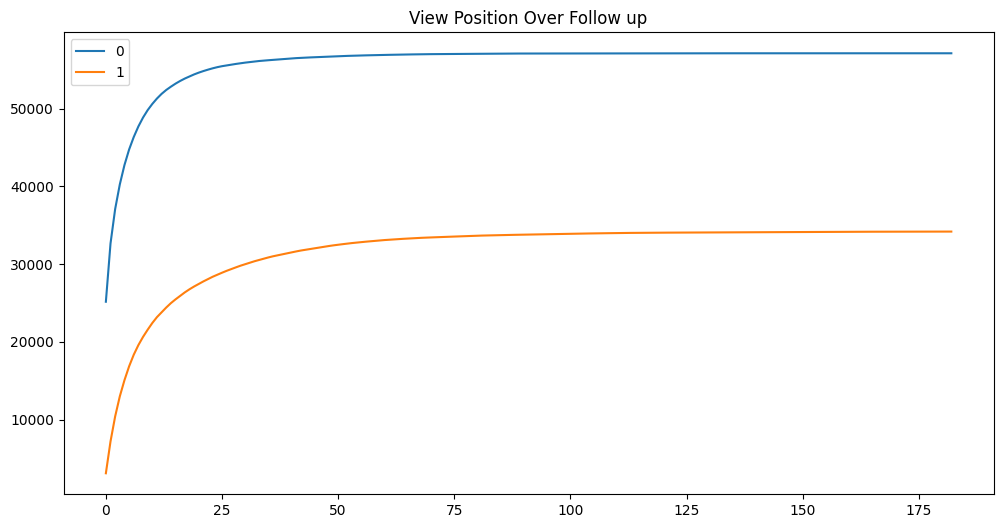

In [43]:
tmp = df.groupby(['Follow-up #','View Position']).size().unstack().fillna(0).cumsum().reset_index()

plt.figure(figsize=(12,6))
for col in df['View Position'].unique():
    plt.plot(tmp['Follow-up #'], tmp[col], label=col)
plt.title('View Position Over Follow up')
plt.legend()
plt.show()

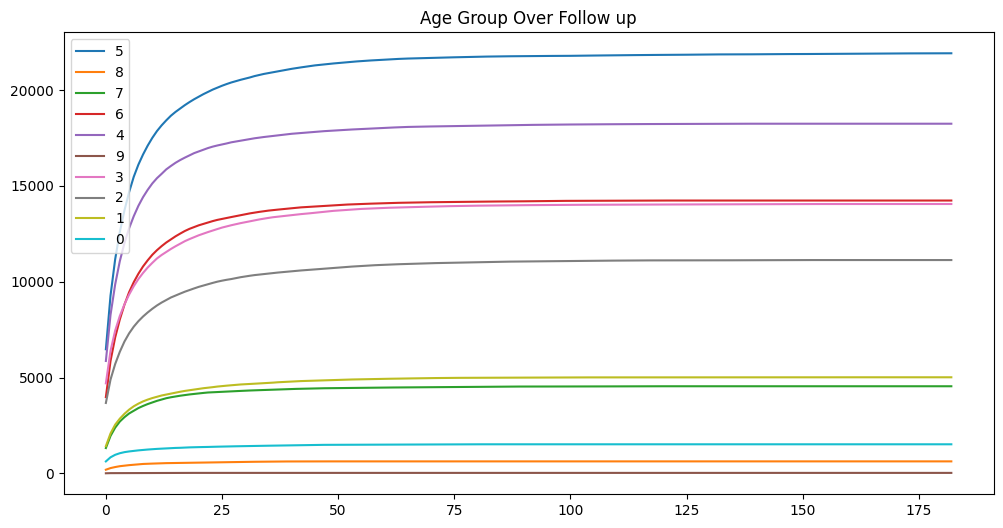

In [44]:
tmp = df.groupby(['Follow-up #','Age Group']).size().unstack().fillna(0).cumsum().reset_index()

plt.figure(figsize=(12,6))
for col in df['Age Group'].unique():
    plt.plot(tmp['Follow-up #'], tmp[col], label=col)
plt.title('Age Group Over Follow up')
plt.legend()
plt.show()

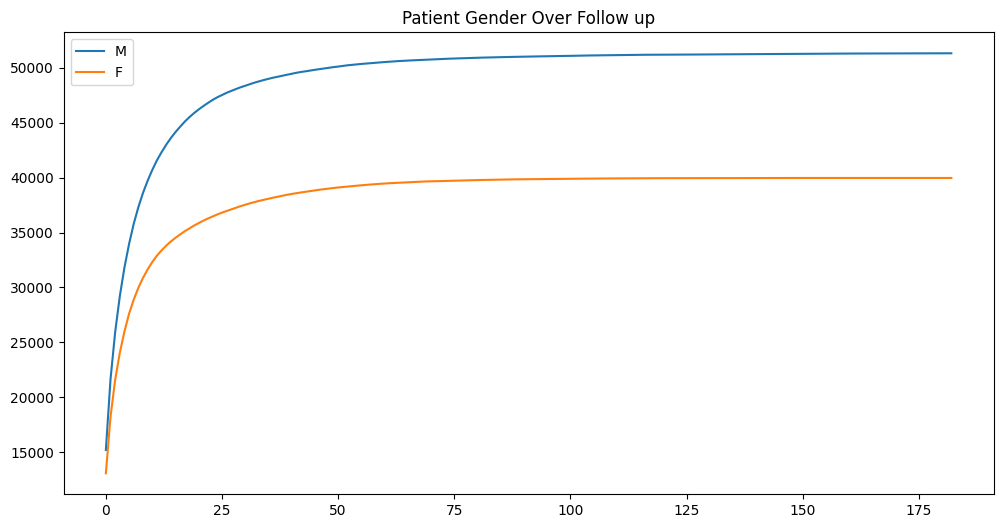

In [45]:
tmp = df.groupby(['Follow-up #','Patient Gender']).size().unstack().fillna(0).cumsum().reset_index()

plt.figure(figsize=(12,6))
for col in df['Patient Gender'].unique():
    plt.plot(tmp['Follow-up #'], tmp[col], label=col)
plt.title('Patient Gender Over Follow up')
plt.legend()
plt.show()

### Correlation Matrix

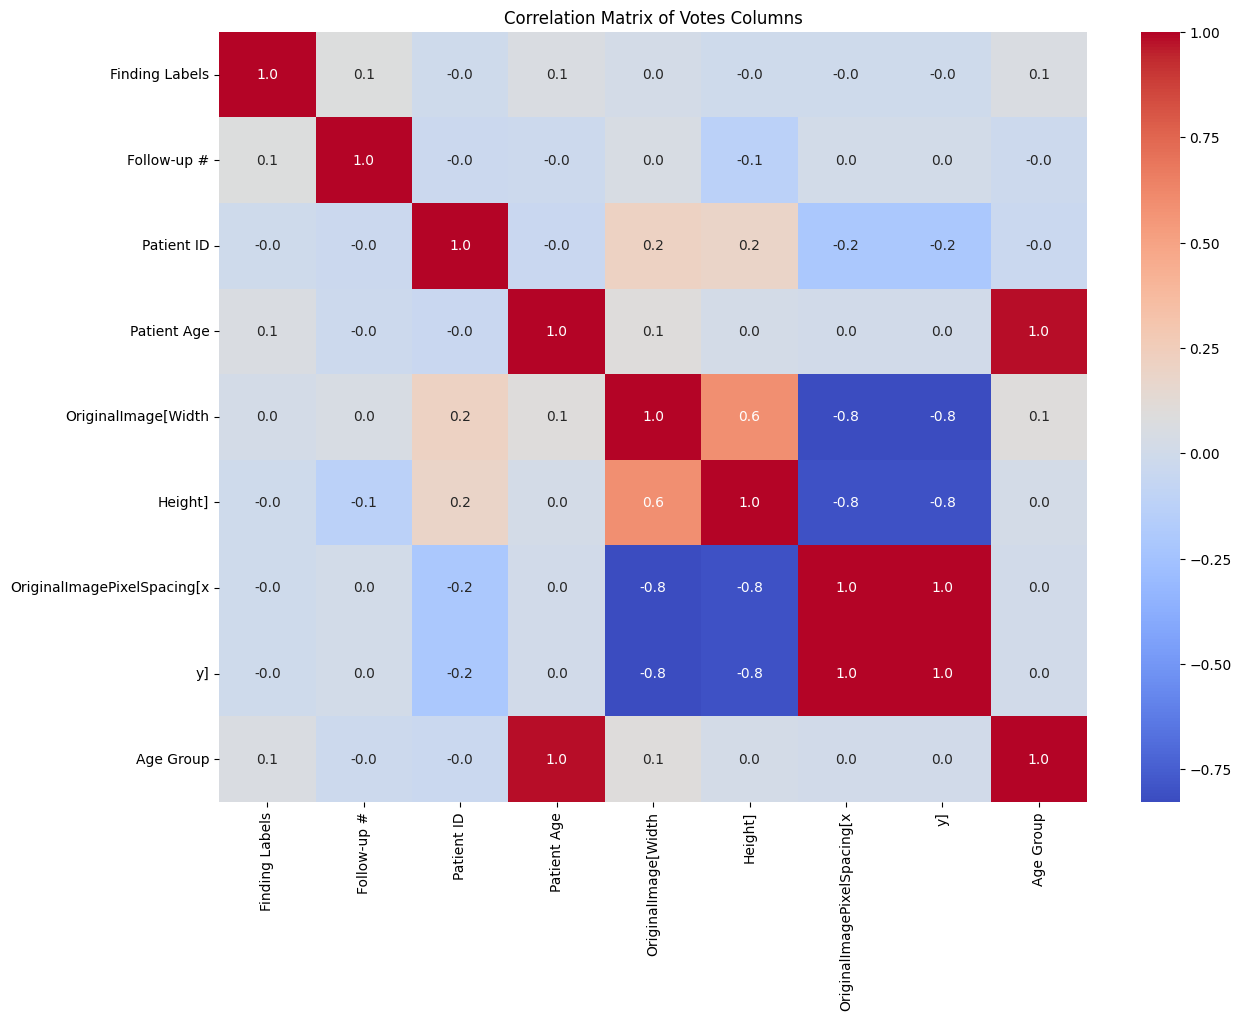

In [46]:
plt.figure(figsize=(14,10))

sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Matrix of Votes Columns")
plt.show()